In [1]:
from cavity_beam_profiler import *
from tools import plot_2D_contour

## Initialize the cavity_profiler class

In [2]:
CF = cavity_profiler('../input/input.yaml')

In [3]:
# screens from records
CF.screens

{'x11': 16.000028294,
 'x12': 16.050028294,
 'x21': 16.650028294000002,
 'x22': 16.750218294,
 'x31': 48.750465293999994,
 'x32': 48.850654882,
 'x41': 49.400654882,
 'x42': 49.556554469999995}

## 
One roundtrip from the undulator center

In [4]:
CF.recirculate()
# beam at screens
CF.record

{'x11': <wavefront.GaussianWavefront at 0x279b7b24d00>,
 'x12': <wavefront.GaussianWavefront at 0x279b35ac400>,
 'x21': <wavefront.GaussianWavefront at 0x279b35ac370>,
 'x22': <wavefront.GaussianWavefront at 0x279b35acfa0>,
 'x31': <wavefront.GaussianWavefront at 0x279b35ac220>,
 'x32': <wavefront.GaussianWavefront at 0x279b356bb20>,
 'x41': <wavefront.GaussianWavefront at 0x279b356bee0>,
 'x42': <wavefront.GaussianWavefront at 0x279b356b4c0>}

## Get beam profile at certain screen

Profile at screen x22


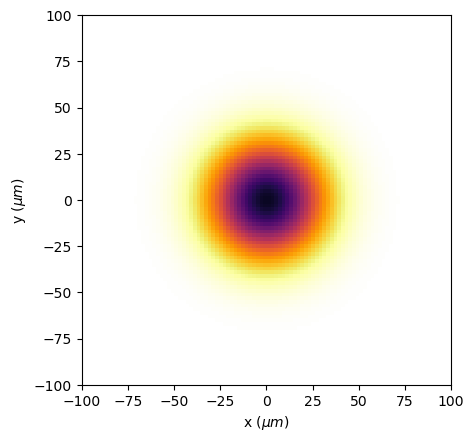

Profile at screen x31


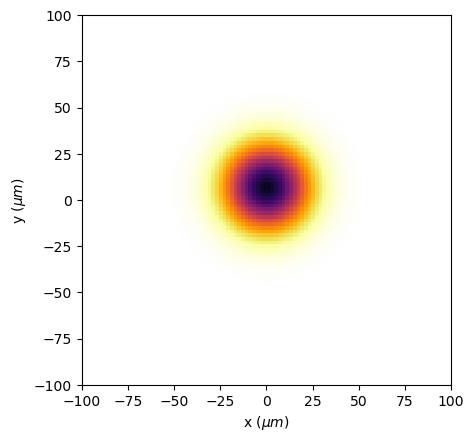

In [5]:
x, y, p = CF.get_profile('x22')
print('Profile at screen x22')
plot_2D_contour(x, y, np.abs(p)**2)

x, y, p = CF.get_profile('x31')
print('Profile at screen x31')
plot_2D_contour(x, y, np.abs(p)**2)

## The second roundtrip 

In [6]:
CF.recirculate()

Profile at screen x22


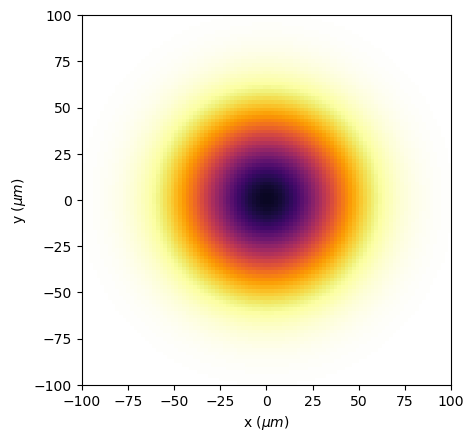

In [7]:
x, y, p = CF.get_profile('x22')
print('Profile at screen x22')
plot_2D_contour(x, y, np.abs(p)**2)

## Include mirror misalignment error

In [8]:
CF = cavity_profiler('../input/input.yaml')
CF.recirculate(dtheta1_x= 800e-9, dtheta2_y = 500e-9)

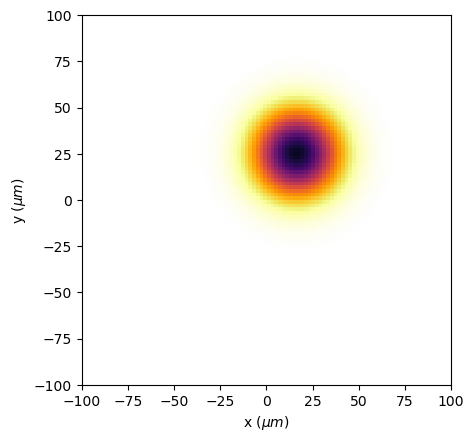

In [9]:
x, y, p = CF.get_profile('x41')
plot_2D_contour(x, y, np.abs(p)**2)

## Lens displacement error

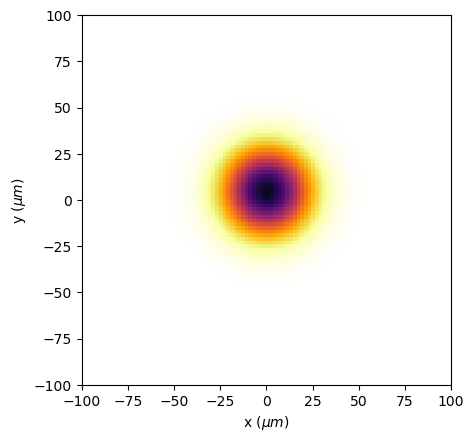

In [10]:
CF = cavity_profiler('../input/input.yaml')
CF.recirculate(dx_CRL1 = 5e-6)
x, y, p = CF.get_profile('x41')
plot_2D_contour(x, y, np.abs(p)**2)